# Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Fashion MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [92]:
X_train.shape

(60000, 28, 28)

# View Data Visually

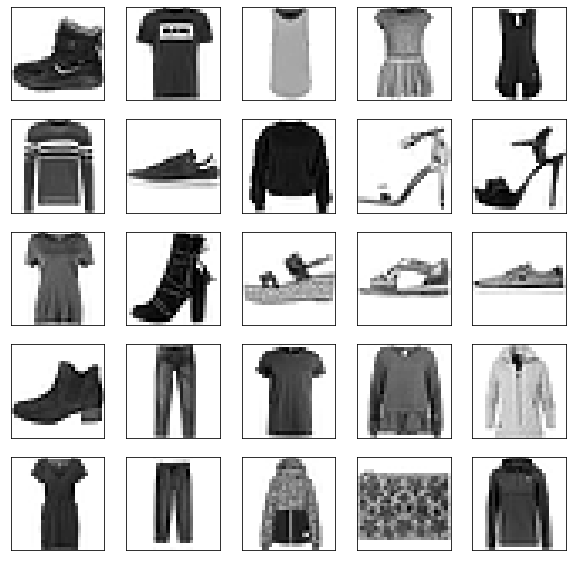

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

# Reshape Image Data

In [0]:
nb_classes = pd.Series(y_train).nunique() # 10

input_dim = len(X_train[0]) * len(X_train[0][0]) # 28*28 = 784
output_dim = nb_classes

X_train_reshape = X_train.reshape(len(X_train), input_dim).astype('float32') / 255 #to scale as a float between 0 - 1
X_test_reshape = X_test.reshape(len(X_test), input_dim).astype('float32') / 255 #to scale as a float between 0 - 1

# One Hot Encode

In [0]:
y_train_cat = to_categorical(y_train, nb_classes)
y_test_cat = to_categorical(y_test, nb_classes)

In [99]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 10)
(10000, 10)


# Artificial Neural Network (ANN)

In [144]:
model = Sequential()

model.add(Dense(128, input_shape = (X_train_reshape.shape[1],), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics = ['accuracy'])

history_ann = model.fit(X_train_reshape, y_train_cat, batch_size = 100, epochs = 20, verbose = 0, validation_data= (X_test_reshape, y_test_cat))

model.evaluate(X_test_reshape, y_test_cat)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3910 - acc: 0.8629


[0.390959543967247, 0.8629]

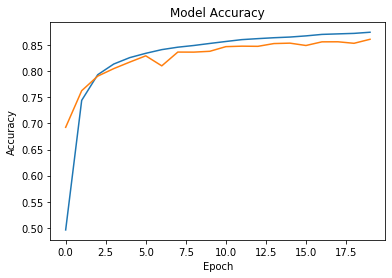

In [12]:
plt.plot(history_ann.history['acc'])
plt.plot(history_ann.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

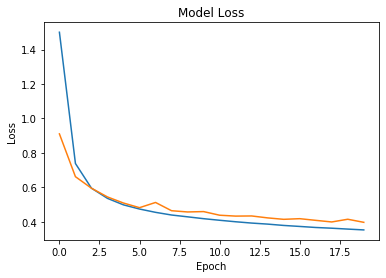

In [13]:
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Convolutional Neural Network

In [0]:
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [195]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), data_format = 'channels_last', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics = ['accuracy'])

history_cnn = model.fit(train_norm, y_train_cat, batch_size = 100, epochs = 20, validation_data= (test_norm, y_test_cat))

model.evaluate(test_norm, y_test_cat)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/sample - loss: 1.2951 - acc: 0.5598 - val_loss: 0.7374 - val_acc: 0.7373
Epoch 2/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6526 - acc: 0.7674 - val_loss: 0.6194 - val_acc: 0.7792
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5669 - acc: 0.7946 - val_loss: 0.5416 - val_acc: 0.8082
Epoch 4/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5211 - acc: 0.8147 - val_loss: 0.5165 - val_acc: 0.8090
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4924 - acc: 0.8262 - val_loss: 0.5355 - val_acc: 0.8067
Epoch 6/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4711 - acc: 0.8332 - val_loss: 0.5354 - val_acc: 0.8036
Epoch 7/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4564 - acc: 0.8394 - val_loss: 0.

[0.3508913855791092, 0.8765]

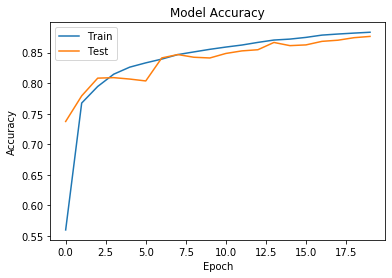

In [196]:
plt.plot(history_cnn.history['acc'], label = 'Train')
plt.plot(history_cnn.history['val_acc'], label = 'Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

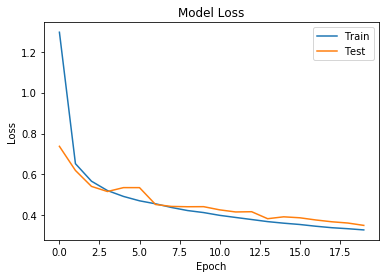

In [197]:
plt.plot(history_cnn.history['loss'], label = 'Train')
plt.plot(history_cnn.history['val_loss'], label = 'Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Fine Tune Best Model

In [214]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), data_format = 'channels_last', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics = ['accuracy'])

history_cnn = model.fit(train_norm, y_train_cat, batch_size = 90, epochs = 29, validation_data= (test_norm, y_test_cat))

model.evaluate(test_norm, y_test_cat)

Train on 60000 samples, validate on 10000 samples
Epoch 1/29
60000/60000 [==============================] - 4s 71us/sample - loss: 1.2272 - acc: 0.5899 - val_loss: 0.6727 - val_acc: 0.7643
Epoch 2/29
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6189 - acc: 0.7742 - val_loss: 0.6569 - val_acc: 0.7612
Epoch 3/29
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5465 - acc: 0.8029 - val_loss: 0.6230 - val_acc: 0.7494
Epoch 4/29
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5085 - acc: 0.8197 - val_loss: 0.5051 - val_acc: 0.8247
Epoch 5/29
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4786 - acc: 0.8302 - val_loss: 0.5035 - val_acc: 0.8132
Epoch 6/29
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4566 - acc: 0.8388 - val_loss: 0.4895 - val_acc: 0.8213
Epoch 7/29
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4401 - acc: 0.8446 - val_loss: 0.

[0.31698593819141385, 0.8836]

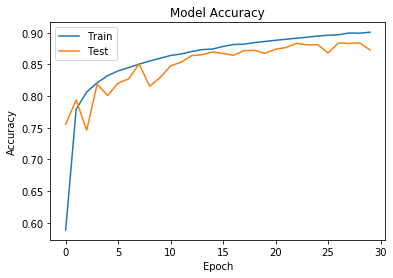

In [212]:
plt.plot(history_cnn.history['acc'], label = 'Train')
plt.plot(history_cnn.history['val_acc'], label = 'Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

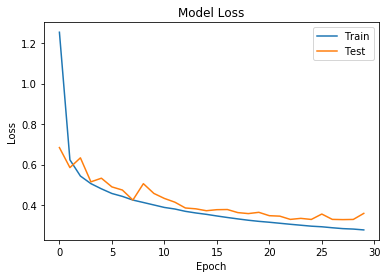

In [213]:
plt.plot(history_cnn.history['loss'], label = 'Train')
plt.plot(history_cnn.history['val_loss'], label = 'Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

A variety of parameters were tuned including: strides, additional layers, activation functions, neurons, batch sizes, epochs, learning rate, dropout, and optimizers. The model above performed the best.